In [1]:
from mplsoccer.pitch import Pitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
import os
import pandas as pd
import numpy as np

In [2]:
# get data
match_files = ['19789.json', '19794.json', '19805.json']
kwargs = {'related_event_df': False,'shot_freeze_frame_df': False, 'tactics_lineup_df': False}
df = pd.concat([read_event(os.path.join(EVENT_SLUG,file), **kwargs)['event'] for file in match_files])
# filter chelsea pressure events
mask_chelsea_pressure = (df.team_name == 'Chelsea FCW') & (df.type_name == 'Pressure')
df = df.loc[mask_chelsea_pressure,['x','y']]

Positional example

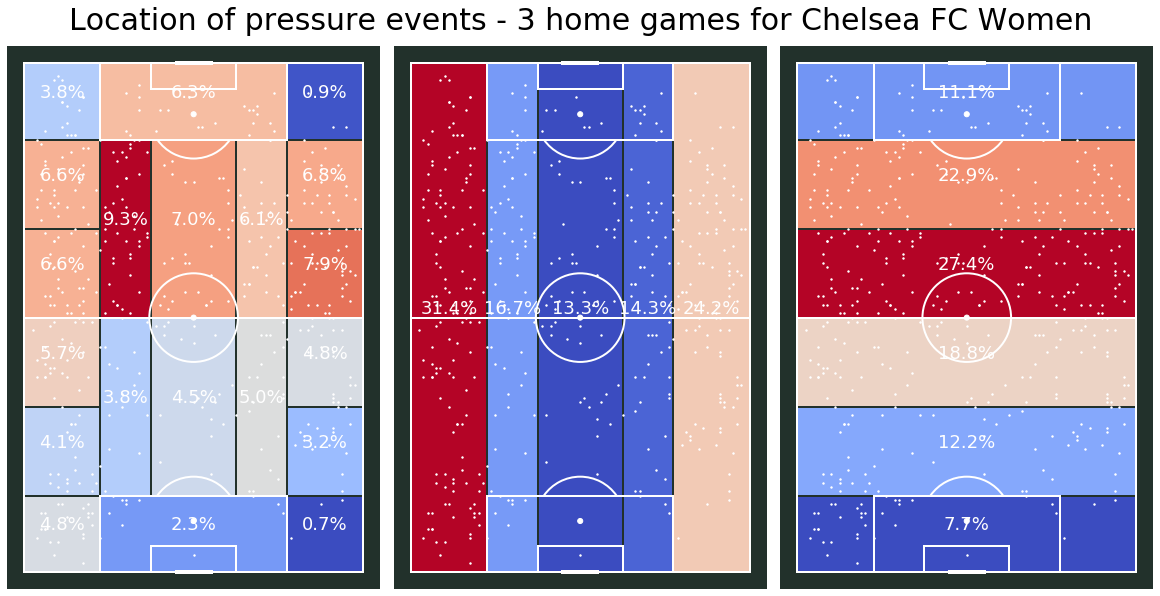

In [3]:
# setup pitch
pitch = Pitch(pitch_type = 'statsbomb', figsize = (16, 9), layout = (1,3), line_zorder=2,
              pitch_color= '#22312b', line_color = 'white',orientation='vertical')
# draw
fig, ax = pitch.draw()
positions = ['full','horizontal','vertical']
for i, pos in enumerate(positions):
    (statistic_grid, statistic, x_grid, y_grid, cx, cy) = pitch.binned_statistic_positional(df.x, df.y,
                                                                                            statistic='count',
                                                                                            positional=pos)
    # work out proportions
    all_pressure_count = statistic.sum()
    statistic_grid = [(array/all_pressure_count*100).round(1) for array in statistic_grid]
    statistic = (statistic/all_pressure_count * 100).round(1)
    pitch.heatmap_positional(x_grid, y_grid, statistic_grid, statistic, ax=ax[i], zorder=2,
                             cmap='coolwarm', edgecolors='#22312b')
    pitch.scatter(df.x, df.y, c='white', s=2, ax=ax[i])
    statistic = [f'{stat}%' for stat in statistic]
    pitch.label_heatmap(statistic, cx, cy, color = 'white', fontsize = 18, ax = ax[i], ha = 'center', va = 'bottom')
fig.suptitle('Location of pressure events - 3 home games for Chelsea FC Women', x=0.5, y=0.98, fontsize=30,);
fig.savefig(os.path.join('figures','README_heatmap_positional.png'), bbox_inches = 'tight')

Bin example

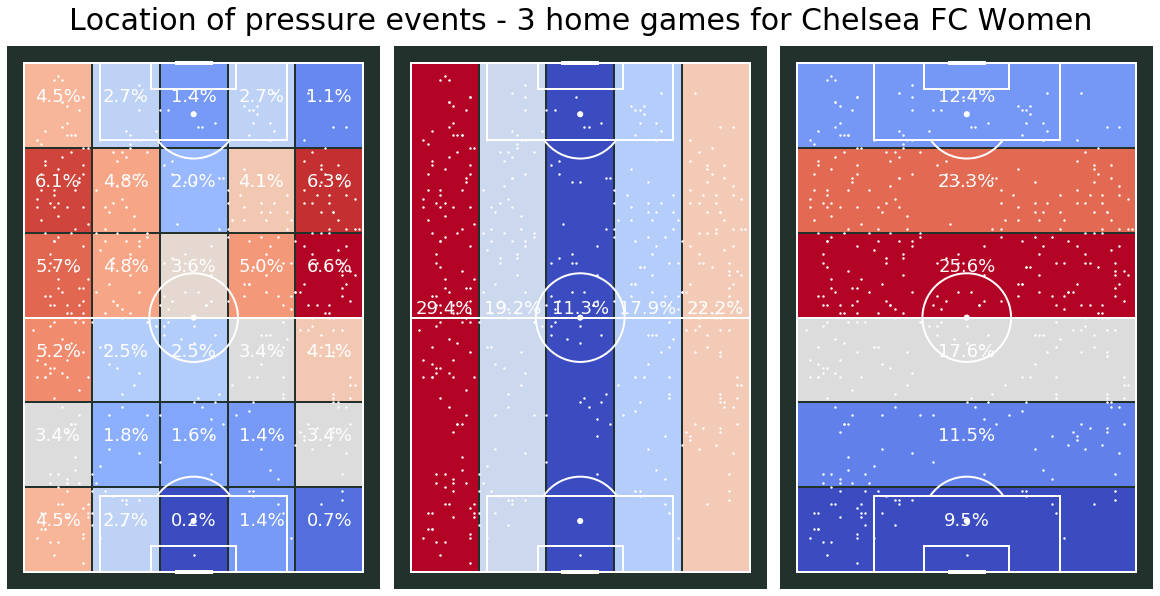

In [4]:
# setup pitch
pitch = Pitch(pitch_type = 'statsbomb', figsize = (16, 9), layout = (1,3), line_zorder=2,
              pitch_color= '#22312b', line_color = 'white',orientation='vertical')
# draw
fig, ax = pitch.draw()
bins = [(6,5),(1,5),(6,1)]
for i, bin in enumerate(bins):
    (statistic, x_grid, y_grid, cx, cy) = pitch.binned_statistic_2d(df.x, df.y,
                                                                    statistic='count', bins = bin)
    # work out proportions
    all_pressure_count = statistic.sum()
    statistic = (statistic/all_pressure_count * 100).round(1)
    # draw
    pitch.heatmap(x_grid, y_grid, statistic, ax=ax[i], zorder=2, cmap='coolwarm', edgecolors = '#22312b')
    pitch.scatter(df.x, df.y, c='white', s=2, ax=ax[i])
    statistic = statistic.astype(str) + np.char.array(['%'])
    pitch.label_heatmap(statistic, cx, cy, color='white', fontsize=18, ax=ax[i], ha = 'center', va = 'bottom')
fig.suptitle('Location of pressure events - 3 home games for Chelsea FC Women', x=0.5, y=0.98, fontsize=30,);
fig.savefig(os.path.join('figures','README_heatmap_bins.png'), bbox_inches = 'tight')